In [25]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [26]:
df = pd.read_csv('C:\\Users\\ghosh\\OneDrive\\Desktop\\ML Projects\\Salary Insights Linear Regression Analysis\\Salary_Data.csv')
print(df)

    YearsExperience    Salary
0               1.1   39343.0
1               1.3   46205.0
2               1.5   37731.0
3               2.0   43525.0
4               2.2   39891.0
5               2.9   56642.0
6               3.0   60150.0
7               3.2   54445.0
8               3.2   64445.0
9               3.7   57189.0
10              3.9   63218.0
11              4.0   55794.0
12              4.0   56957.0
13              4.1   57081.0
14              4.5   61111.0
15              4.9       NaN
16              5.1   66029.0
17              5.3   83088.0
18              5.9   81363.0
19              6.0   93940.0
20              6.8   91738.0
21              7.1   98273.0
22              7.9  101302.0
23              8.2  113812.0
24              8.7  109431.0
25              9.0  105582.0
26              9.5  116969.0
27              9.6  112635.0
28             10.3  122391.0
29             10.5  121872.0


In [27]:
df = df.dropna()

In [28]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

<h3>Splitting the Dataset
<h4>x represents independent feature/features based on which predictions,relations with y are determined.
<h4>y represents dependent feature which is actually predicted by the model based on x.

In [29]:
x = df[['YearsExperience']]
y = df['Salary']

To check linear Relation between features we use the following

1. Scatterplot

Visual Insight: Scatter plots can show whether there's an upward (positive) or downward (negative) trend between two variables.
If the points roughly form a straight-line pattern, then linear regression may be appropriate.

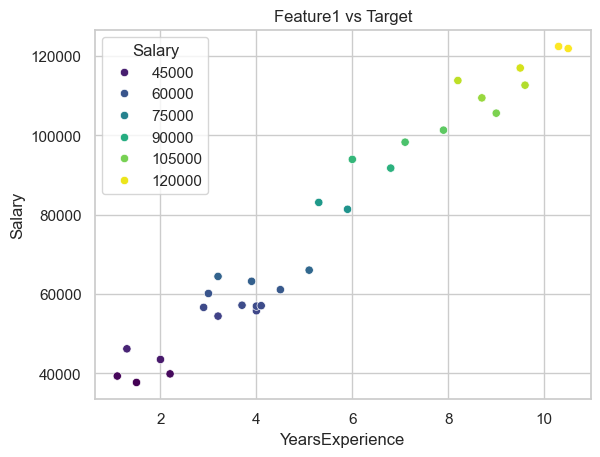

In [30]:
sns.set_theme(style="whitegrid")
sns.scatterplot(data=df,x='YearsExperience',y='Salary', hue='Salary', palette='viridis')
plt.title("Feature1 vs Target")
plt.show()

LIMITATIONS <br>
Multidimensionality: They only show 2D relationships — they can’t reveal multicollinearity or combined effects of multiple features.
Noise and Outliers can make a linear pattern less obvious.

2. Correlation coefficient

In [31]:
df_corr = pd.concat([x, y], axis=1)
df_corr.corr()

,YearsExperience,Salary
YearsExperience,1.000000,0.978595
Salary,0.978595,1.000000


<Axes: >

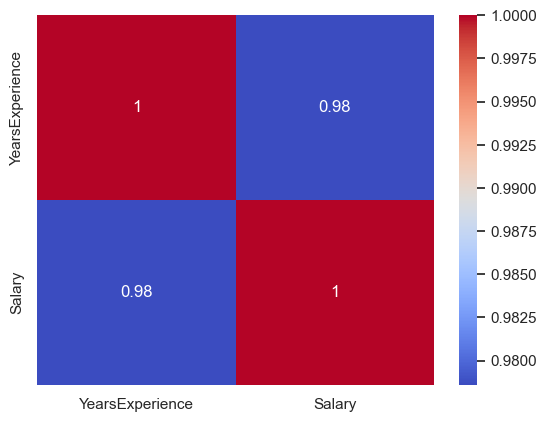

In [32]:
sns.heatmap(df_corr.corr(), annot=True, cmap='coolwarm')

near +1: indicates strong positive linear Relation <br>
near -1: indicates strong negative linear Relation <br>
near 0: indicates no linear Relation

<h1>Model Training

Assigning model to Linear Regression

In [33]:
model = LinearRegression()


In [34]:
# Train-test split
x_train, x_test, y_train, y_test = train_test_split(
    x, y, test_size=0.3, random_state=42, shuffle=True
)

# Fit model
model = LinearRegression()
model.fit(x_train, y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [35]:
y_pred = model.predict(x_test)

In [36]:
inp = [[3.9]]
yp = model.predict(inp)
print(yp)

[62088.90739232]


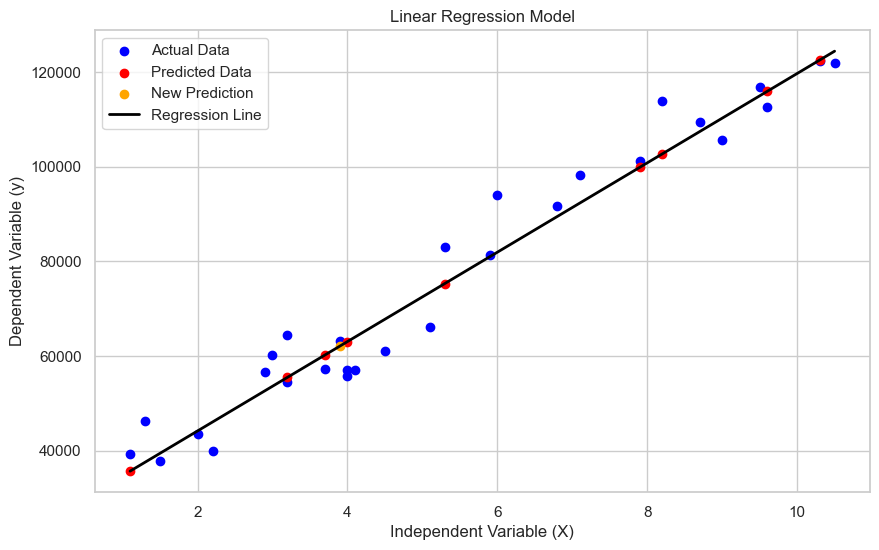

In [37]:
plt.figure(figsize=(10, 6))

# Actual data
plt.scatter(x, y, color="blue", label="Actual Data")

# Predicted values on test set
plt.scatter(x_test, y_pred, color="red", label="Predicted Data")

# New predictions (if applicable)
plt.scatter(inp, yp, color="orange", label="New Prediction")

# Regression line (make sure x is sorted if necessary)
x_sorted = np.sort(x, axis=0)
plt.plot(x_sorted, model.predict(x_sorted), color="black", linewidth=2, label="Regression Line")

plt.xlabel("Independent Variable (X)")
plt.ylabel("Dependent Variable (y)")
plt.title("Linear Regression Model")
plt.legend()
plt.grid(True)
plt.show()
